[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/manukj/CatDogClassifier/blob/master/CatandDog.ipynb)

In [1]:
from keras.preprocessing import image
import os
import numpy as np
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras import optimizers


Using TensorFlow backend.


In [4]:
! git clone https://github.com/manukj/CatDogClassifier.git

Cloning into 'CatDogClassifier'...
remote: Enumerating objects: 1407, done.
remote: Counting objects: 100% (1407/1407), done.
remote: Compressing objects: 100% (1407/1407), done.
remote: Total 1407 (delta 0), reused 1407 (delta 0), pack-reused 0
Receiving objects: 100% (1407/1407), 30.55 MiB | 29.85 MiB/s, done.


In [5]:
# dimensions of our images.
img_width, img_height = 150, 150


train_data_dir = 'CatDogClassifier/Train'
validation_data_dir = 'CatDogClassifier/Test'

# used to rescale the pixel values from [0, 255] to [0, 1] interval
datagen = ImageDataGenerator(rescale=1./255)

# automagically retrieve images and their classes for train and validation sets
train_generator = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=16,
        class_mode='binary')

validation_generator = datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=32,
        class_mode='binary')

Found 1399 images belonging to 2 classes.
Found 64 images belonging to 2 classes.


In [6]:
#creating a model

model = Sequential()
model.add(Convolution2D(32, 3, 3, input_shape=(img_width, img_height,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Convolution2D(32,3,3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Convolution2D(32,3,3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(150, 150,...)`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  # This is added back by InteractiveShellApp.init_path()


In [0]:
model.compile(loss = 'binary_crossentropy',
             optimizer = 'rmsprop',
             metrics = ['accuracy'])

In [0]:
nb_epoch = 20
nb_train_samples = 1399
nb_validation_samples = 64

In [9]:
model.fit_generator(
        train_generator,
        samples_per_epoch=nb_train_samples,
        epochs=nb_epoch,
        validation_data=validation_generator,
       nb_val_samples=nb_validation_samples)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., epochs=20, validation_data=<keras.pre..., steps_per_epoch=87, validation_steps=64)`
  


Epoch 1/20
87/87 [==============================] - 78s 902ms/step - loss: 0.7231 - acc: 0.5231 - val_loss: 0.6897 - val_acc: 0.5000
Epoch 2/20
87/87 [==============================] - 78s 901ms/step - loss: 0.6884 - acc: 0.5802 - val_loss: 0.6823 - val_acc: 0.6094
Epoch 3/20
87/87 [==============================] - 78s 900ms/step - loss: 0.6652 - acc: 0.6150 - val_loss: 0.6294 - val_acc: 0.6875
Epoch 4/20
87/87 [==============================] - 78s 899ms/step - loss: 0.6105 - acc: 0.6924 - val_loss: 0.5860 - val_acc: 0.7031
Epoch 5/20
87/87 [==============================] - 78s 900ms/step - loss: 0.5392 - acc: 0.7257 - val_loss: 0.5077 - val_acc: 0.7969
Epoch 6/20
87/87 [==============================] - 78s 901ms/step - loss: 0.5174 - acc: 0.7417 - val_loss: 0.4207 - val_acc: 0.8281
Epoch 7/20
87/87 [==============================] - 78s 894ms/step - loss: 0.4557 - acc: 0.7909 - val_loss: 0.4487 - val_acc: 0.8125
Epoch 8/20
87/87 [==============================] - 78s 900ms/step - 

In [0]:
model.save_weights('basic_cnn_20_epochs.h5')

In [11]:
model.evaluate_generator(validation_generator, nb_validation_samples)

[0.010080065301735885, 1.0]

(1, 150, 150, 3)
[[0.]]


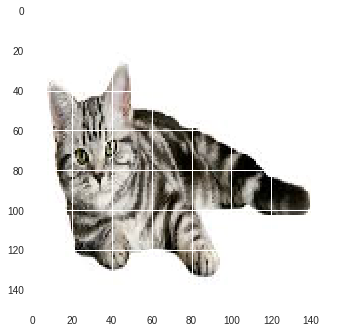

In [13]:
from PIL import Image
from matplotlib.pyplot import imshow
from urllib.request import urlopen
import io


fd = urlopen("https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSy-68mb2E3qNJzPk0u8_7US_mfeWaskp68nRzmvGo5WFY6kXvJ")
image_file = io.BytesIO(fd.read())
im = Image.open(image_file)


newImage = im.resize((150, 150))
im = np.asarray(newImage)
imshow(im)
im = im.reshape((1,150,150,3))
print(im.shape)
predict = model.predict(im)
print(predict)
